# **NOTEBOOK**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [ ]:
!pip install ydata-profiling

In [4]:
df1 = pd.read_csv('Desktop/Data Cafe/customers.csv', parse_dates=['became_member_on'], index_col='became_member_on')
df2 = pd.read_csv('Desktop/Data Cafe/events.csv')
df3 = pd.read_csv('Desktop/Data Cafe/offers.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Desktop/Data Cafe/offers.csv'

# **df1**


In [ ]:
df1.head()

customer_id gender  age    income
became_member_on                                                        
2017-02-12        68be06ca386d4c31939f3a4f0e3dd783    NaN  118       NaN
2017-07-15        0610b486422d4921ae7d2bf64640c50b      F   55  112000.0
2018-07-12        38fe809add3b4fcf9315a9694bb96ff5    NaN  118       NaN
2017-05-09        78afa995795e4d85b5d9ceeca43f5fef      F   75  100000.0
2017-08-04        a03223e636434f42ac4c3df47e8bac43    NaN  118       NaN

In [ ]:
df1.shape

(17000, 4)

In [ ]:
from ydata_profiling import ProfileReport
ProfileReport(df1)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df1.describe()

age         income
count  17000.000000   14825.000000
mean      62.531412   65404.991568
std       26.738580   21598.299410
min       18.000000   30000.000000
25%       45.000000   49000.000000
50%       58.000000   64000.000000
75%       73.000000   80000.000000
max      118.000000  120000.000000

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17000 entries, 2017-02-12 to 2017-07-22
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  17000 non-null  object 
 1   gender       14825 non-null  object 
 2   age          17000 non-null  int64  
 3   income       14825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
df1.isnull().sum()

customer_id       0
gender         2175
age               0
income         2175
dtype: int64

In [ ]:
df1.duplicated().sum()

0

# **df2** : **events**

In [ ]:
df2.head()

customer_id           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0

In [ ]:
df2.shape

(306534, 4)

In [ ]:
from ydata_profiling import ProfileReport
ProfileReport(df2)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df2.describe()

time
count  306534.000000
mean      366.382940
std       200.326314
min         0.000000
25%       186.000000
50%       408.000000
75%       528.000000
max       714.000000

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  306534 non-null  object
 1   event        306534 non-null  object
 2   value        306534 non-null  object
 3   time         306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [ ]:
df2.duplicated().sum()

397

In [ ]:
duplicate_rows = df2[df2.duplicated()]
(duplicate_rows)

customer_id            event  \
66123   3dde94fa581145cb9f206624f1a94d5a  offer completed   
66783   e9fb6ed2cecb4980ba98c86abc9c91e3  offer completed   
67614   a7dc060f6fc94ca7bf71fbb188187dca  offer completed   
68562   30478a4c1e884a63a822aa87b833ed7a  offer completed   
69218   84fb57a7fe8045a8bf6236738ee73a0f  offer completed   
...                                  ...              ...   
297625  6ba2450a438540999e633a5d99c7c7a0  offer completed   
299471  f39fe7ea4e5946378e6d224504b77797  offer completed   
304756  0785f1fce0b04ba08e01c7d2ebab4917  offer completed   
305551  b7e216b6472b46648272c29a52a86702  offer completed   
306456  f3e801caeafe4899b3b989b586e74ac7  offer completed   

                                                    value  time  
66123   {'offer_id': '2906b810c7d4411798c6938adc9daaa5...   168  
66783   {'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...   168  
67614   {'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...   168  
68562   {'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...   168  
69218   {'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...   168  
...                                                   ...   ...  
297625  {'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...   672  
299471  {'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...   684  
304756  {'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...   708  
305551  {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...   714  
306456  {'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...   714  

[397 rows x 4 columns]

# **df3 offers**

In [ ]:
df3.head(10)

offer_id     offer_type  difficulty  reward  \
0  ae264e3637204a6fb9bb56bc8210ddfd           bogo          10      10   
1  4d5c57ea9a6940dd891ad53e9dbe8da0           bogo          10      10   
2  3f207df678b143eea3cee63160fa8bed  informational           0       0   
3  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo           5       5   
4  0b1e1539f2cc45b7b9fa7c272da2e1d7       discount          20       5   
5  2298d6c36e964ae4a3e7e9706d1fb8c2       discount           7       3   
6  fafdcd668e3743c1bb461111dcafc2a4       discount          10       2   
7  5a8bc65990b245e5a138643cd4eb9837  informational           0       0   
8  f19421c1d4aa40978ebb69ca19b0e20d           bogo           5       5   
9  2906b810c7d4411798c6938adc9daaa5       discount          10       2   

   duration                              channels  
0         7         ['email', 'mobile', 'social']  
1         5  ['web', 'email', 'mobile', 'social']  
2         4            ['web', 'email', 'mobile']  
3         7            ['web', 'email', 'mobile']  
4        10                      ['web', 'email']  
5         7  ['web', 'email', 'mobile', 'social']  
6        10  ['web', 'email', 'mobile', 'social']  
7         3         ['email', 'mobile', 'social']  
8         5  ['web', 'email', 'mobile', 'social']  
9         7            ['web', 'email', 'mobile']

In [ ]:
df3.shape

(10, 6)

In [ ]:
from ydata_profiling import ProfileReport
ProfileReport(df3)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   offer_id    10 non-null     object
 1   offer_type  10 non-null     object
 2   difficulty  10 non-null     int64 
 3   reward      10 non-null     int64 
 4   duration    10 non-null     int64 
 5   channels    10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [ ]:
df3.describe()

difficulty     reward   duration
count   10.000000  10.000000  10.000000
mean     7.700000   4.200000   6.500000
std      5.831905   3.583915   2.321398
min      0.000000   0.000000   3.000000
25%      5.000000   2.000000   5.000000
50%      8.500000   4.000000   7.000000
75%     10.000000   5.000000   7.000000
max     20.000000  10.000000  10.000000

In [ ]:
df3.duplicated().sum()

0

In [ ]:
df3.isnull().sum()

offer_id      0
offer_type    0
difficulty    0
reward        0
duration      0
channels      0
dtype: int64

# **DATA CLEANING**

In [ ]:
df1 = df1.dropna(subset=['income'])

In [ ]:
df1.isnull().sum()

customer_id    0
gender         0
age            0
income         0
dtype: int64

In [ ]:
df1.shape

(14825, 4)

In [ ]:
df2.drop_duplicates(inplace=True)


In [ ]:
df2.duplicated().sum()


0

In [ ]:
df2.shape

(306137, 4)

In [ ]:
import ast

In [ ]:
df2['offer_id'] = df2['value'].apply(lambda x: ast.literal_eval(x).get('offer_id', None))

In [ ]:
df2

customer_id           event  \
0       78afa995795e4d85b5d9ceeca43f5fef  offer received   
1       a03223e636434f42ac4c3df47e8bac43  offer received   
2       e2127556f4f64592b11af22de27a7932  offer received   
3       8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4       68617ca6246f4fbc85e91a2a49552598  offer received   
...                                  ...             ...   
306529  b3a1272bc9904337b331bf348c3e8c17     transaction   
306530  68213b08d99a4ae1b0dcb72aebd9aa35     transaction   
306531  a00058cf10334a308c68e7631c529907     transaction   
306532  76ddbd6576844afe811f1a3c0fbb5bec     transaction   
306533  c02b10e8752c4d8e9b73f918558531f7     transaction   

                                                   value  time offer_id  
0       {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0     None  
1       {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0     None  
2       {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0     None  
3       {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0     None  
4       {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0     None  
...                                                  ...   ...      ...  
306529                    {'amount': 1.5899999999999999}   714     None  
306530                                  {'amount': 9.53}   714     None  
306531                                  {'amount': 3.61}   714     None  
306532                    {'amount': 3.5300000000000002}   714     None  
306533                                  {'amount': 4.05}   714     None  

[306137 rows x 5 columns]

# **EDA**

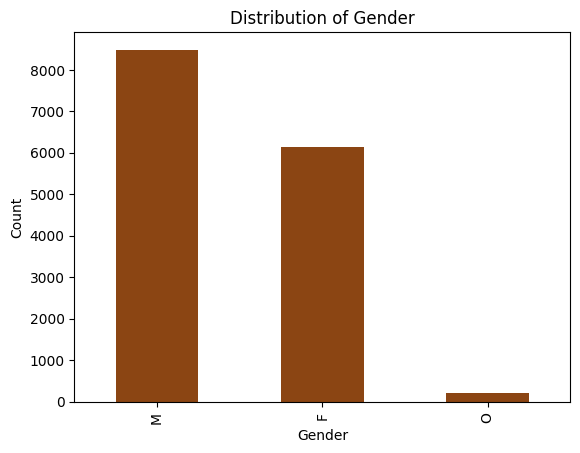

In [ ]:
gender_count = df1['gender'].value_counts()
(gender_count)

gender_count.plot(kind='bar', title='Distribution of Gender', color='#8B4513')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: title={'center': 'Distribution of Age'}, ylabel='Frequency'>

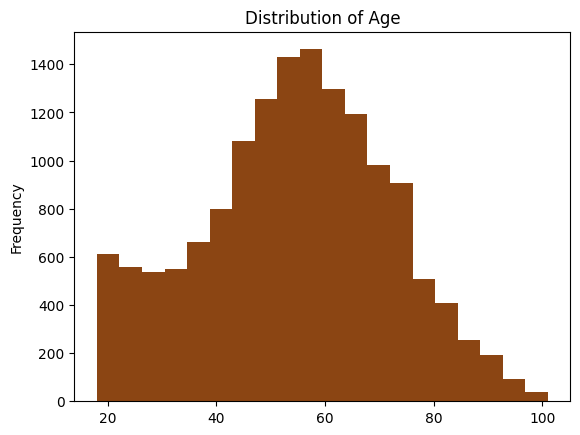

In [ ]:
average_age = df1['age'].mean()
average_age

df1['age'].plot(kind='hist', bins=20, title='Distribution of Age', color='#8B4513')


<Axes: title={'center': 'Average Age by Gender'}, xlabel='gender'>

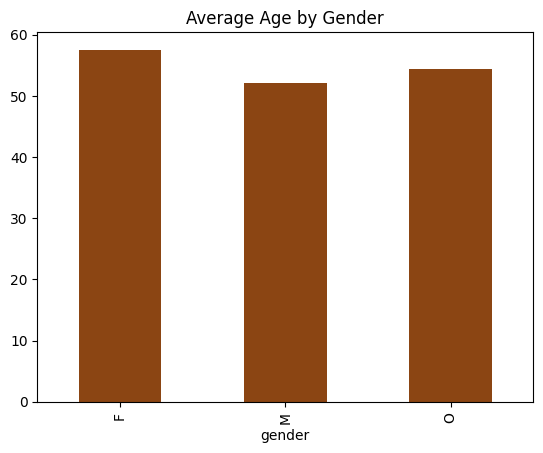

In [ ]:
age_gender = df1.groupby('gender')['age'].mean()
(age_gender)

age_gender.plot(kind='bar', title='Average Age by Gender', color='#8B4513')

<Axes: title={'center': 'Distribution of Income'}, ylabel='Frequency'>

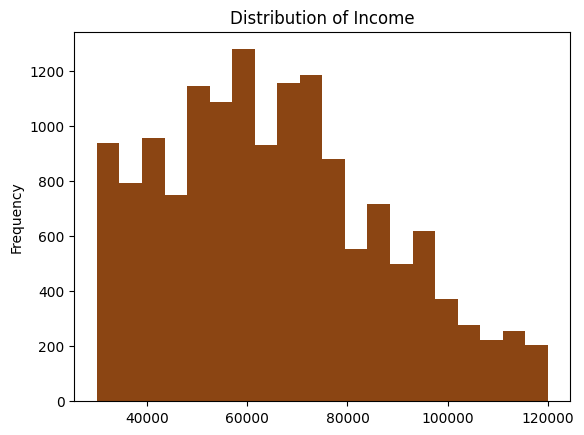

In [ ]:
average_income = df1['income'].mean()
average_income

df1['income'].plot(kind='hist', bins=20, title='Distribution of Income', color='#8B4513')

<Axes: title={'center': 'Income vs Age'}, xlabel='age', ylabel='income'>

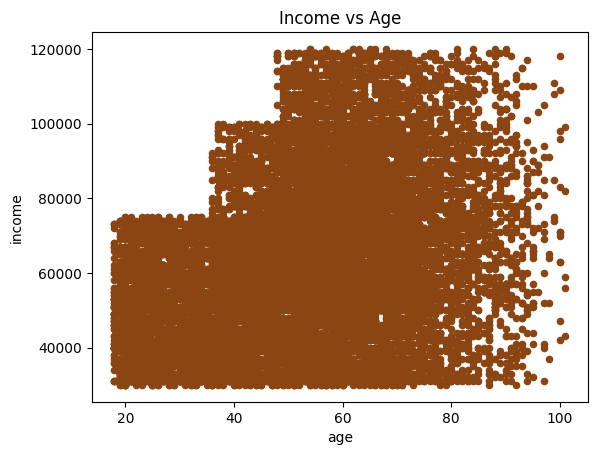

In [ ]:
df1.plot.scatter(x='age', y='income', title='Income vs Age',  color='#8B4513')

<Axes: title={'center': 'Income by Age and Gender'}, xlabel='age'>

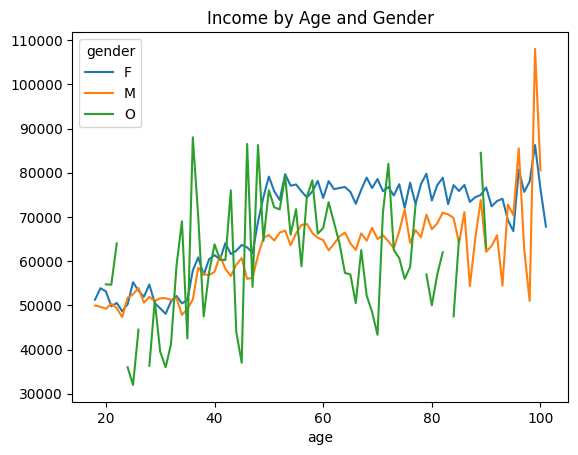

In [ ]:
age_income_gender = df1.pivot_table(values='income', index='age', columns='gender', aggfunc='mean', )
age_income_gender

age_income_gender.plot(title='Income by Age and Gender',)

In [ ]:
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']

df1['age_group'] = pd.cut(df1['age'], bins=bins, labels=labels)

income_by_age_group = df1.groupby('age_group')['income'].mean().reset_index()

fig = px.bar(income_by_age_group, x='age_group', y='income',
             title='Income by Age Group',
             labels={'age_group':'Age Group', 'income':'Average Income'})

fig.show()


<ipython-input-44-a1e33d198578>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age_group'] = pd.cut(df1['age'], bins=bins, labels=labels)
<ipython-input-44-a1e33d198578>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_age_group = df1.groupby('age_group')['income'].mean().reset_index()


In [ ]:

bins = [30000, 60000, 90000, 120000]
labels = ['30000-60000', '60000-90000', '90000+']

df1['income_group'] = pd.cut(df1['income'], bins=bins, labels=labels)


age_by_income_group = df1.groupby('income_group')['age'].mean().reset_index()

fig = px.bar(age_by_income_group, x='income_group', y='age',
             title='Average Age by Income Group',
             labels={'income_group':'Income Group', 'age':'Average Age'},
             color='age')

fig.show()


<ipython-input-45-f31355ffbd5d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-45-f31355ffbd5d>:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### **EDA (df2)**

In [ ]:
df2.head(5)

customer_id           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time offer_id  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0     None  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0     None  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0     None  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0     None  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0     None

In [ ]:
event_column = df2['event']
(event_column)

0         offer received
1         offer received
2         offer received
3         offer received
4         offer received
               ...      
306529       transaction
306530       transaction
306531       transaction
306532       transaction
306533       transaction
Name: event, Length: 306137, dtype: object

In [ ]:
(df2['event'].describe())


count          306137
unique              4
top       transaction
freq           138953
Name: event, dtype: object

In [ ]:
df2['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [ ]:
df2['event'].value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33182
Name: count, dtype: int64

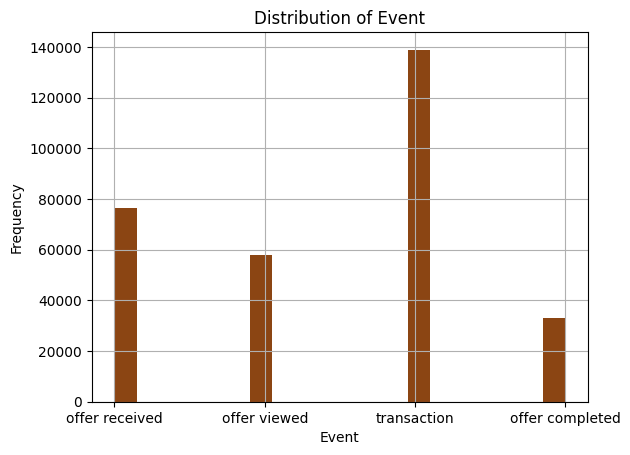

In [ ]:
df2['event'].hist(bins=20, color='#8B4513')
plt.xlabel('Event')
plt.ylabel('Frequency')
plt.title('Distribution of Event')
plt.show()

# **Marge Data & Create a chart to answer the questions.**

In [ ]:
merged_df = pd.merge(df1, df2, on='customer_id')
merged_df = pd.merge(merged_df, df3, on='offer_id')


In [ ]:
channels_df = merged_df[merged_df['event'] == 'offer completed'].explode('channels')

channels_success = channels_df.groupby('channels').size()

(channels_success)

channels
['email', 'mobile', 'social']            3604
['web', 'email', 'mobile', 'social']    17159
['web', 'email', 'mobile']               8001
['web', 'email']                         3306
dtype: int64

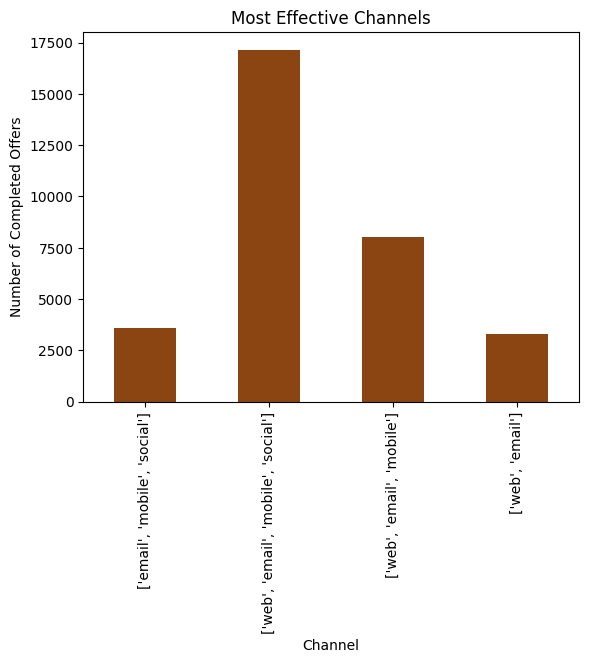

In [ ]:
channels_success.plot(kind='bar', color='#8B4513')
plt.title('Most Effective Channels')
plt.xlabel('Channel')
plt.ylabel('Number of Completed Offers')
plt.show()

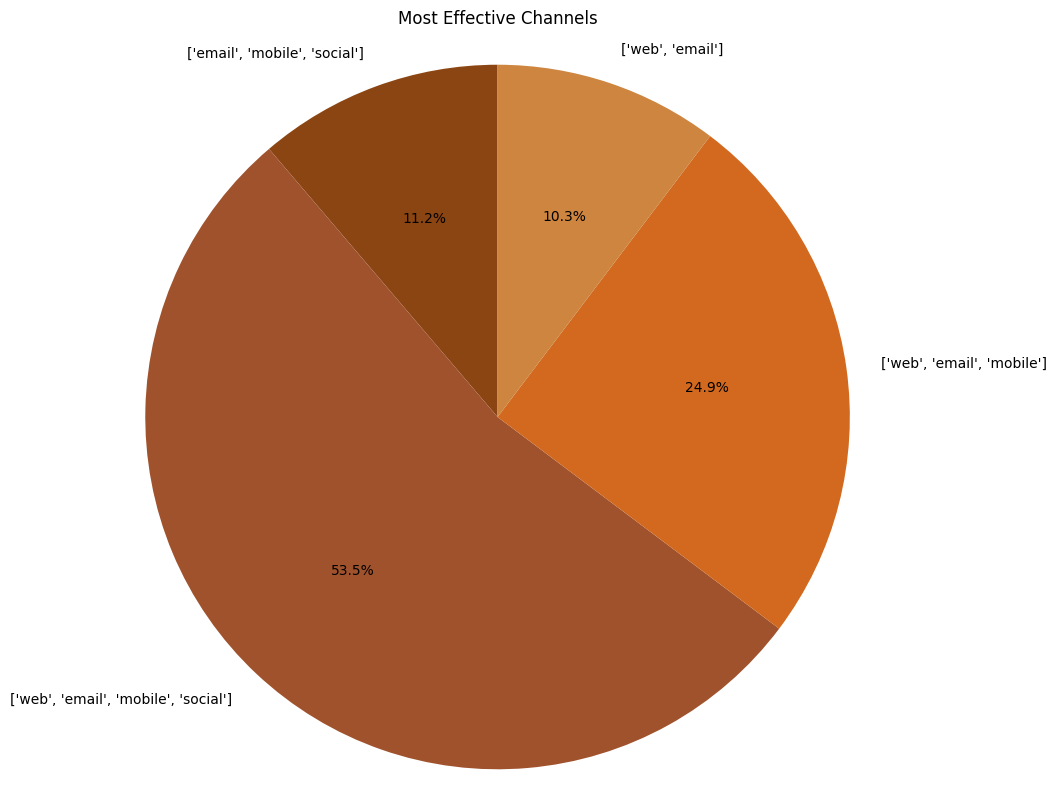

In [ ]:
channel_success_count = merged_df[merged_df['event'] == 'offer completed'].groupby('channels').size().reset_index(name='success_count')

brown_colors = ['#8B4513', '#A0522D', '#D2691E', '#CD853F']

plt.figure(figsize=(10, 10))
plt.pie(channel_success_count['success_count'], labels=channel_success_count['channels'],
        autopct='%1.1f%%', startangle=90, colors=brown_colors)
plt.title('Most Effective Channels')
plt.axis('equal')
plt.show()


In [ ]:
offer_success_by_type = merged_df[merged_df['event'] == 'offer completed'].groupby('offer_type').size()

(offer_success_by_type)

offer_type
bogo        15100
discount    16970
dtype: int64

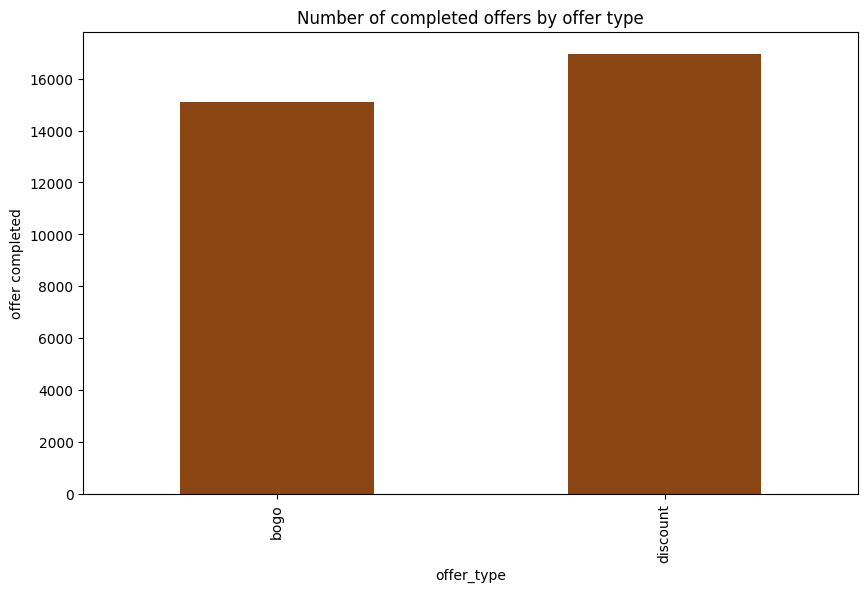

In [ ]:
offer_success_count = merged_df[merged_df['event'] == 'offer completed'].groupby('offer_type').size()

plt.figure(figsize=(10, 6))
offer_success_count.plot(kind='bar', color='#8B4513')
plt.title('Number of completed offers by offer type')
plt.xlabel('offer_type')
plt.ylabel('offer completed')
plt.show()

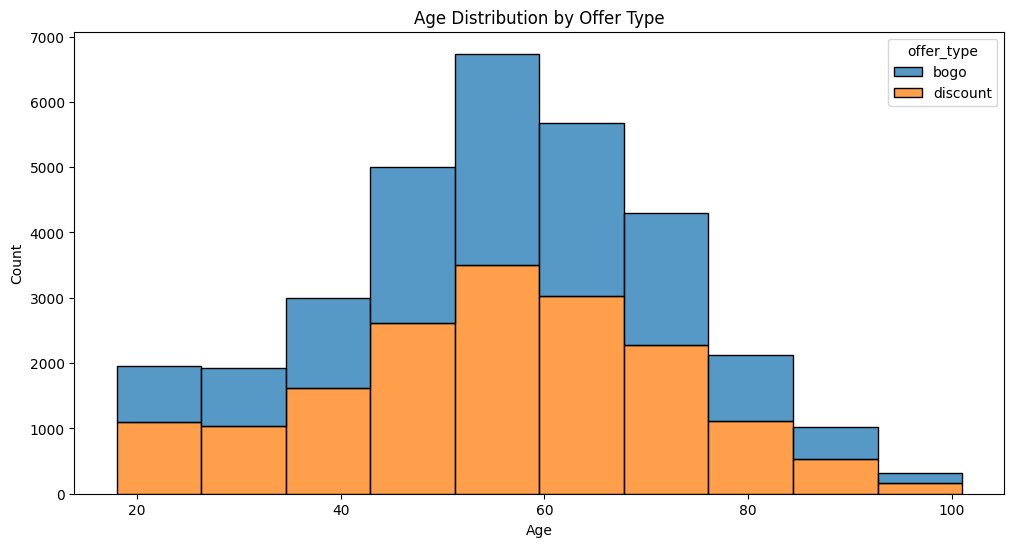

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_df, x='age', hue='offer_type', multiple='stack', bins=10,  color=['brown', 'blue'])
plt.title('Age Distribution by Offer Type')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


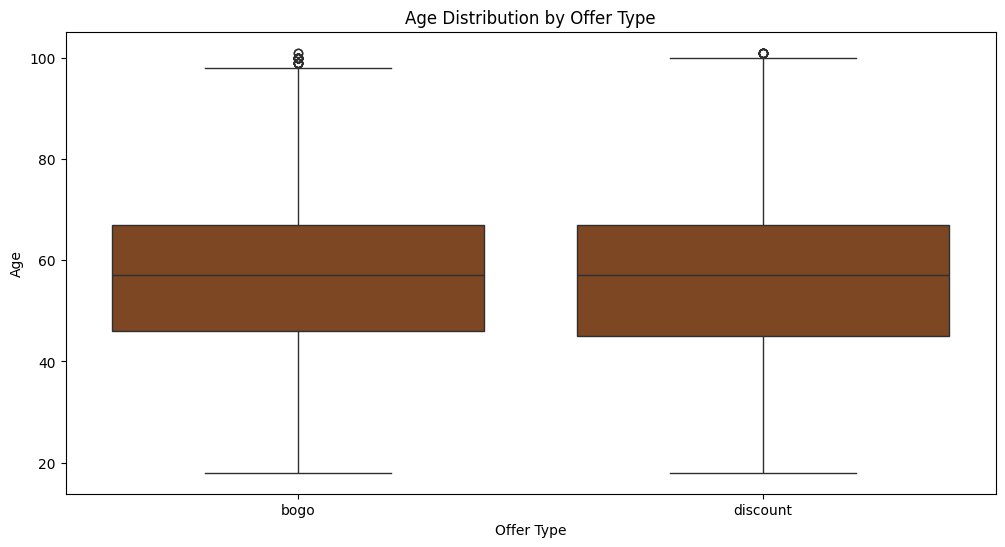

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='offer_type', y='age',color='#8B4513' , data=merged_df)
plt.title('Age Distribution by Offer Type')
plt.xlabel('Offer Type')
plt.ylabel('Age')
plt.show()


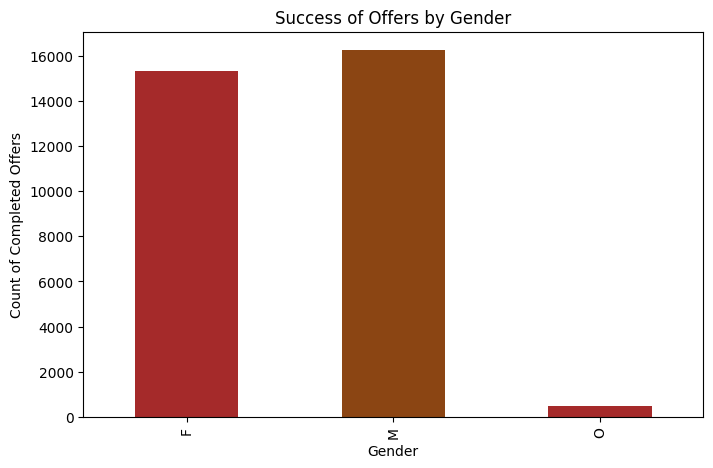

In [ ]:
gender_success_count = merged_df[merged_df['event'] == 'offer completed'].groupby('gender').size()

plt.figure(figsize=(8, 5))
gender_success_count.plot(kind='bar', color=['brown', '#8B4513'])
plt.title('Success of Offers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Completed Offers')
plt.show()


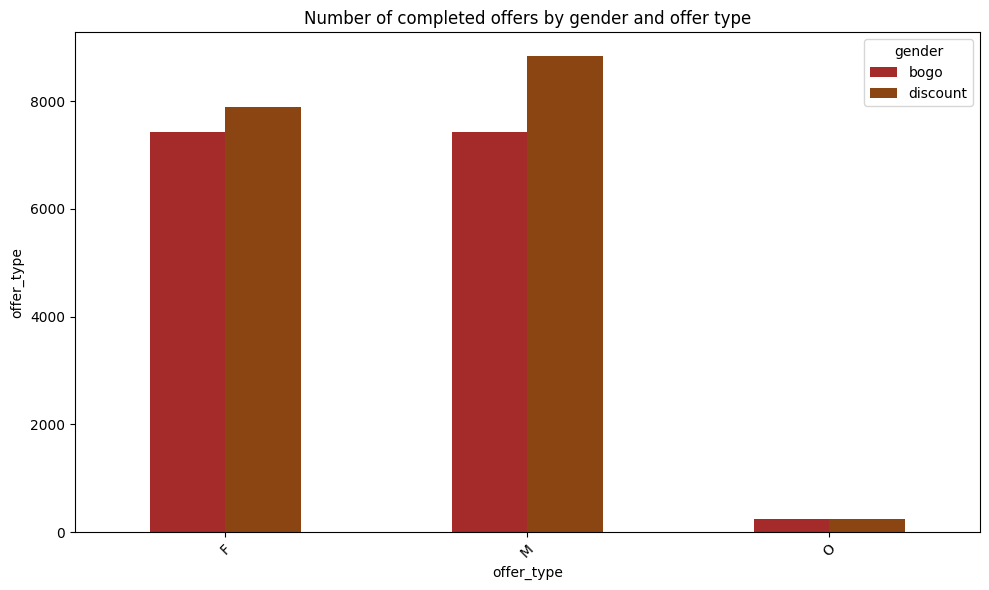

In [ ]:
offer_success_by_gender = merged_df.groupby(['gender', 'offer_type']).size().unstack(fill_value=0)

offer_success_by_gender.plot(kind='bar', figsize=(10, 6),color=['brown', '#8B4513'],)
plt.title('Number of completed offers by gender and offer type')
plt.xlabel('offer_type')
plt.ylabel('offer_type')
plt.xticks(rotation=45)
plt.legend(title='gender')
plt.tight_layout()
plt.show()



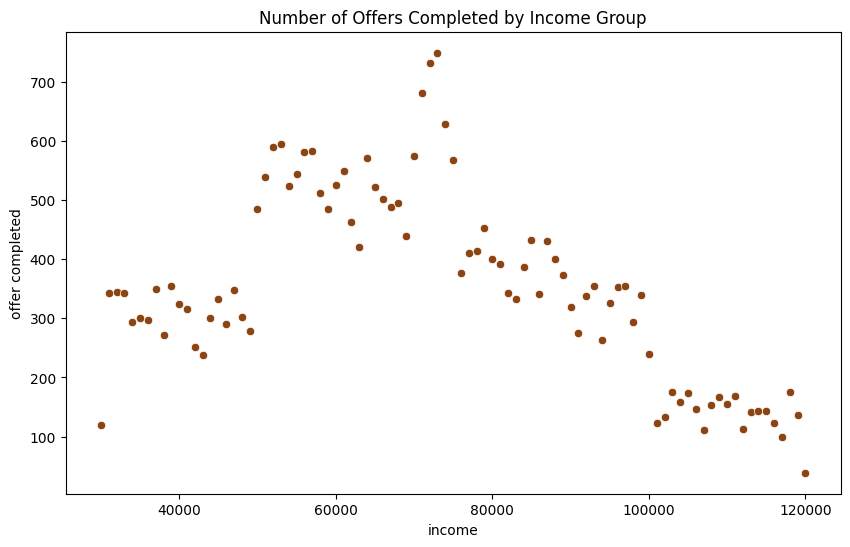

In [ ]:

success_by_income = merged_df[merged_df['event'] == 'offer completed'].groupby('income').size().reset_index(name='success_count')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=success_by_income, x='income', y='success_count', color='#8B4513')
plt.title('Number of Offers Completed by Income Group')
plt.xlabel('income')
plt.ylabel('offer completed')
plt.show()



<ipython-input-63-2329e0525f05>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



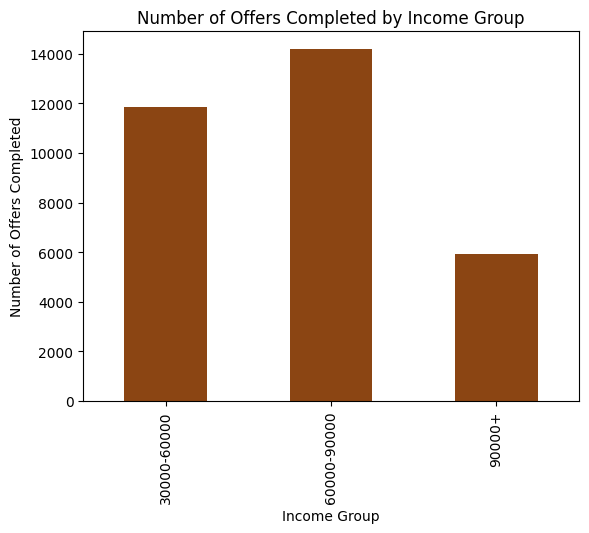

In [ ]:
offers_completed_by_income = merged_df.groupby('income_group').size()

(offers_completed_by_income)

offers_completed_by_income.plot(kind='bar', title='Number of Offers Completed by Income Group', color='#8B4513')
plt.xlabel('Income Group')
plt.ylabel('Number of Offers Completed')
plt.show()
